Muplitple-Variable Calculus
===

Theorem
---
  Suppose that we have a relative extremum of $f (\mathbb{x})$ with $g(\mathbb{x}) = 0,h(\mathbb{x}),\cdots$ at $\mathbb{x}_0\in\mathbb{R}^n$.
  Then there exists a $\lambda$, for which $(\mathbb{x}_0, \lambda)$ is the critical
  point,  of $L = f (\mathbb{x}) + \lambda g (\mathbb{x})+\mu h(\mathbb{x})+\cdots$, i.e.:
$$  \nabla f(\mathbb{x}_0)+\lambda\nabla g(\mathbb{x}_0)+\mu\nabla h(\mathbb{x}_0)+\cdots=\mathbb{0}$$

  This function, $L$, is called
  **Lagrangian** of $f (\mathbb{x})$ with $g (\mathbb{x}),h (\mathbb{x}),\cdots$, reference the two-dimensional case:

<img src="imgs/8/cal7-27.png" width=60% /> 

In real world, Lagrangian  is more realistic than other kinds of optimization
problem: finding extrema under resources limited.


In [1]:
%matplotlib inline

#rcParams['figure.figsize'] = (10,3) #wide graphs by default
import scipy
import numpy as np
import time
from termcolor import colored
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output,display
import matplotlib.pylab as plt
from matplotlib import cm
plt.style.use('ggplot')
%matplotlib inline 

Symbolic Calculus 
---
As following, we will implement the solver of Lagrange's multiplier (for 2 and 3 variables' cases). Together with previous result, they can describe how to solve the optimization of multiple-variable functions.

In [2]:
#
from sympy import hessian,symbols,solve,diff,sin,cos,pi,exp,det,pprint
x,y,z,a=symbols("x y z a",real=True)

grad = lambda func, vars :[diff(func,var) for var in vars]

In [3]:
def criticaltype(f):
    cpts=solve(grad(f,[x,y]),[x,y])
    H=hessian(f,[x,y]);
    H_det=H.det();
    print("Hessian Matrix\n---")
    pprint(H)
    
    num=1
    if len(cpts)==0:
       print("   no critical point!")  
    elif (type(cpts)==dict):
       """
       If only one critical point, return {x:a,y:b} --- dict,
       if more than one point return {(a,b),(c,d),...} --- list
       """ 
       cx=cpts[x]
       cy=cpts[y]
       print("only one critical (x,y)=(%s,%s)" %(cx,cy))
       delta2=H_det.subs({x:cx,y:cy}) 
       if delta2<0:
          print("   |H|=%s<0:  Saddle point here." %delta2)
       elif delta2==0:
          print("   |H|=0:  No conclusion.") 
       else:
          f1=diff(f,x,2).subs({x:cx,y:cy})
          if f1>0:
             print("   |H|=%s>0, fxx=%s>0:  local minimum here." %(delta2,f1))
          else:
             print("   |H|=%s>0, fxx=%s<0:    local maximum here." %(delta2,f1))
    else:
       for i in cpts: 
            cx=i[0]
            cy=i[1]
            print("%d. critical (x,y)=(%s,%s)" %(num,cx,cy))
            delta2=H_det.subs({x:cx,y:cy}) 
            if delta2<0:
               print("   |H|=%s<0:  Saddle point here." %delta2)
            elif delta2==0:
               print("   |H|=0:  No conclusion.") 
            else:
               f1=diff(f,x,2).subs({x:cx,y:cy})
               if f1>0:
                  print("   |H|=%s>0, fxx=%s>0:  local minimum here." %(delta2,f1))
               else:
                  print("   |H|=%s>0, fxx=%s<0:    local maximum here." %(delta2,f1))
            #print(H_det)
            num+=1    

In [4]:
def CriticalType(f,*vars):
    cpts=solve(grad(f,*vars),*vars)
    H=hessian(f,*vars);
    #H_det=H.det();
    print("Hessian Matrix\n---")
    pprint(H)
    print("\n---\n")
    
    num=1
    if len(cpts)==0:
       print("   no critical point!")  
    elif (type(cpts)==dict):
       """
       If only one critical point, return {x:a,y:b} --- dict,
       if more than one point return {(a,b),(c,d),...} --- list
       """ 
       cx=cpts[vars[0][0]]
       cy=cpts[vars[0][1]]
       cz=cpts[vars[0][2]]
       print("only one critical (x,y,z)=(%s,%s,%s)" %(cx,cy,cz))
       H1=H.extract([0],[0])
       H2=H.extract([0,1],[0,1])
       H3=H
       delta1=H1.det().subs({x:cx,y:cy,z:cz})  
       delta2=H2.det().subs({x:cx,y:cy,z:cz})  
       delta3=H3.det().subs({x:cx,y:cy,z:cz})  
       if delta3<0:
          if (delta1<0 and delta2>0):
             print("   |H|=%s>0, fxx=%s<0:    local maximum here." %(delta3,delta1))  
          else: 
              print("   |H|=%s<0:  Saddle point here." %delta3)
       elif delta3==0:
          print("   |H|=0:  No conclusion.") 
       else:
          if (delta1>0 and delta2>0):
             print("   |H|=%s>0, |H2|=%s>0,H1=%s>0:  local minimum here." %(delta3,delta2,delta1))
          else:
             print("   |H|=%s>0, |H2|=%s, H1=%s<0: saddle here." %(delta3,delta2, delta1))
    else:
       for i in cpts: 
            cx=i[0]
            cy=i[1]
            cz=i[2]
            print("%d. critical (x,y,z)=(%s,%s,%s)" %(num,cx,cy,cz))
            H1=H.extract([0],[0])
            H2=H.extract([0,1],[0,1])
            H3=H
            delta1=H1.det().subs({x:cx,y:cy,z:cz})  
            delta2=H2.det().subs({x:cx,y:cy,z:cz})  
            delta3=H3.det().subs({x:cx,y:cy,z:cz})  
            if delta3<0:
               if (delta1<0 and delta2>0):
                   print("   |H|=%s>0, fxx=%s<0:    local maximum here." %(delta3,delta1))  
               else: 
                   print("   |H|=%s<0:  Saddle point here." %delta3)
            elif delta3==0:
               print("   |H|=0:  No conclusion.") 
            else:
               if (delta1>0 and delta2>0):
                  print("   |H|=%s>0, |H2|=%s>0,H1=%s>0:  local minimum here." %(delta3,delta2,delta1))
               else:
                  print("   |H|=%s>0, |H2|=%s, H1=%s<0: saddle here." %(delta3,delta2, delta1))
            num+=1    

In [5]:
def lagrangian(func,X,conditions):
    """
    Inputs:
      func: functions of 2/3 variable
      X: list of variables, [x,y] or [x,y,z]
      conditions: list of condictions, [cond1,cond2,...]
    No output, but print out the result:
      1. one soluntion: print value of variables
      2. more than one solutions: print out minimum and maximum
    """
    l,m=symbols("lambda mu")
    if len(X)==2 and len(conditions)==1:
       L=func+l*conditions[0]
       cpts=solve([diff(L,x),diff(L,y),conditions[0]],[x,y,l])
       print("Function, %s, subject to %s=0\n===" %(func,conditions[0])) 
    elif  len(X)==3 and len(conditions)==1: 
       L=func+l*conditions[0]
       cpts=solve([diff(L,x),diff(L,y),diff(L,z),conditions[0]],[x,y,z,l]) 
       print("Function, %s, subject to %s=0\n===" %(func,conditions[0])) 
    else:
       L=func+l*conditions[0]+m* conditions[1]
       cpts=solve([diff(L,x),diff(L,y),diff(L,z),conditions[0],conditions[1]],[x,y,z,l,m]) 
       print("Function, %s, subject to %s=0 and %s=0\n===" %(func,conditions[0],conditions[1]))
    i=1
    vals=[]
    
    if type(cpts)!=dict: 
       for cpt in cpts: 
           if len(X)==2:
              funcVal=func.subs({x:cpt[0],y:cpt[1]})
              print("  %d֯ ). f = %s = %s at critical value (x,y)=(%s,%s)" %(i,func,funcVal,cpt[0],cpt[1]))
           else:
              funcVal=func.subs({x:cpt[0],y:cpt[1],z:cpt[2]})
              print("  %d֯ ). f = %s = %s at critical value (x,y,z)=(%s,%s,%s)" %(i,func, funcVal,cpt[0],cpt[1],cpt[2]))
           vals.append(funcVal)
           i+=1
       print("  ---\n")  
       print("  Maximum on the boundary is %s" %max(vals))
       print("  Minimum on the boundary is %s" %min(vals)) 
    else:
       dictlist=[]
       for key, value in cpts.items():
           temp = [key,value]
           dictlist.append(temp)
       cpts=dictlist 
       if len(X)==2:
          funcVal=func.subs({x:cpts[0][1],y:cpts[1][1]}) 
          print("  f= %s = %s\n" %(func,funcVal)) 
          print("  Only one critical found, (x,y)=(%s,%s)" %(cpts[0][1],cpts[1][1]))
       else:
          funcVal=func.subs({x:cpts[0][1],y:cpts[1][1],z:cpts[2][1]})
          print("  f= %s = %s\n" %(func,funcVal))  
          print("  Only one critical found, (x,y,z)=(%s,%s,%s)" %(cpts[0][1],cpts[1][1],cpts[2][1]))
       print("  ---\n")  
       print(colored("  it could  be extremum.", 'red') )         

In [52]:
f=x*y*y
cond=12-2*x*x-y*y
lagrangian(f,[x,y],[cond])

Function, x*y**2, subject to -2*x**2 - y**2 + 12=0
===
  1֯ ). f = x*y**2 = -8*sqrt(2) at critical value (x,y)=(-sqrt(2),-2*sqrt(2))
  2֯ ). f = x*y**2 = -8*sqrt(2) at critical value (x,y)=(-sqrt(2),2*sqrt(2))
  3֯ ). f = x*y**2 = 8*sqrt(2) at critical value (x,y)=(sqrt(2),-2*sqrt(2))
  4֯ ). f = x*y**2 = 8*sqrt(2) at critical value (x,y)=(sqrt(2),2*sqrt(2))
  5֯ ). f = x*y**2 = 0 at critical value (x,y)=(-sqrt(6),0)
  6֯ ). f = x*y**2 = 0 at critical value (x,y)=(sqrt(6),0)
  ---

  Maximum on the boundary is 8*sqrt(2)
  Minimum on the boundary is -8*sqrt(2)


In [61]:
f2=x*x+y*y+z*z
cond2=1+x-y

lagrangian(f2,[x,y,z],[cond2])#,solvable=False)

Function, x**2 + y**2 + z**2, subject to x - y + 1=0
===
  f= x**2 + y**2 + z**2 = 1/2

  Only one critical found, (x,y,z)=(-1/2,1/2,0)
  ---

  it could  be extremum.


In [62]:
f3=x+y+z
cond31=1-x**2-y**2
cond32=2-x-z

lagrangian(f3,[x,y,z],[cond31,cond32])

Function, x + y + z, subject to -x**2 - y**2 + 1=0 and -x - z + 2=0
===
  1֯ ). f = x + y + z = 1 at critical value (x,y,z)=(0,-1,2)
  2֯ ). f = x + y + z = 3 at critical value (x,y,z)=(0,1,2)
  ---

  Maximum on the boundary is 3
  Minimum on the boundary is 1


Q$^\circ$1.
---
$f(x,y) = x^2+y^2$  with $0\le x,y$ and $3x+8y\le7$.



<ipython-input-7-855d11b2ba40>:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


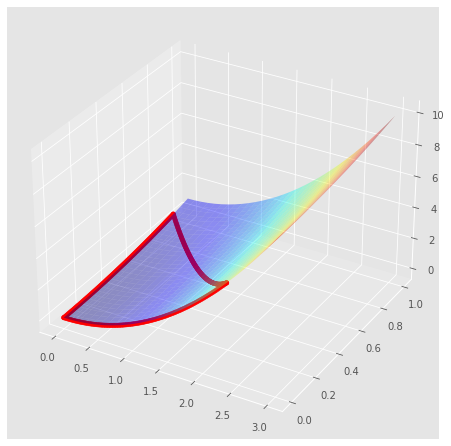

In [7]:
#
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)

X = np.linspace(0, 3, 30)
Y = np.linspace(0, 1, 30)
X,Y=np.meshgrid(X,Y)
func= X**2+Y**2
base=0*X

X1 = np.linspace(0, 7/3, 100)
Y1 = np.linspace(0, 1, 100)
Z1=X1**2

X2 = np.linspace(0, 3, 100)
Y2 = np.linspace(0, 7/8, 100)
Z2=Y2**2

X3 = np.linspace(0, 7/3, 100)
Y3 = (7-3*X3)/8
Z3=X3**2+Y3**2


ax.scatter(X1,0*Y1,Z1, color="red",alpha=0.9)
ax.scatter(0*X2,Y2,Z2,color="red",alpha=0.9)
ax.scatter(X3,Y3, Z3,color="red",alpha=0.9)

ax.plot_surface(X,Y, func, rstride=1, cstride=1, cmap=cm.jet,alpha=0.4)

#ax.plot_surface(X,Y, base, rstride=1, cstride=1, cmap=cm.jet,alpha=0.2)


In [7]:
f=x**2+y**2
cond1=3*x+8*y-7
lagrangian(f,[x,y],[cond1])

Function, x**2 + y**2, subject to 3*x + 8*y - 7=0
===
  f= x**2 + y**2 = 49/73

  Only one critical found, (x,y)=(21/73,56/73)
  ---

  it could  be extremum.


Trivially,reference picture above, maximum is 5.44 at $(7/3,0)$, minimum is 0 at $(0,0)$, all on the boundary:
1. (0,0), the critical point also on the boundary, $f(0,0)=0$
2. The Lagrangian, $L=x^2+y^2+\lambda(7-3x-8y)$, implies:
$$ (0,0,0)=\nabla L\Rightarrow 2x-3\lambda=2y-8=0\Rightarrow(x,y)=(21/73,56/73)$$
3. Also the function values at corner, (0,0), (7/3,0),(0,7/8)
4. Maximum is the maximum of above, $f(7/3,0)\approx 5.44$, minimum is the minum of above, $f(0,0)=0$ 

Q$^\circ$2.
---
$f(x,y,z) = 4x+y+4z$  with $0\le x^2+y^2+z^2\le4$.


In [66]:
f=4*x+y+4*z
cond1=4-x*x-y*y-z*z
lagrangian(f,[x,y,z],[cond1])

Function, 4*x + y + 4*z, subject to -x**2 - y**2 - z**2 + 4=0
===
  1֯ ). f = 4*x + y + 4*z = -2*sqrt(33) at critical value (x,y,z)=(-8*sqrt(33)/33,-2*sqrt(33)/33,-8*sqrt(33)/33)
  2֯ ). f = 4*x + y + 4*z = 2*sqrt(33) at critical value (x,y,z)=(8*sqrt(33)/33,2*sqrt(33)/33,8*sqrt(33)/33)
  ---

  Maximum on the boundary is 2*sqrt(33)
  Minimum on the boundary is -2*sqrt(33)


Conclusion
---
1. $f(x,y,z)$ is continuous on $D$, extrema exist at critical point or boundary.
2. no critical point exists. extrima occur at the boundary, i.e. on the sphere.
3. The optimization becomes
\begin{eqnarray}
F(x,y,z,\lambda)&=&4x+y+4z+\lambda(4-x^2-y^2-z^2)\\
\nabla F=\vec0&\Rightarrow& x=z=2\lambda,y=\lambda/2\\
              &\Rightarrow& x=z=4y \\
   x^2+y^2+z^2=4&\Rightarrow& \lambda=\pm\frac{2}{\sqrt{33}}
\end{eqnarray}

Q$^\circ$3.
---
$f(x,y) = 3x+3y$ with $-5\le x,y\le 5$  

Trivially, maximum: 30, minimum: -30, all at the corner points, (-5,-5) and (5,5) respectively.

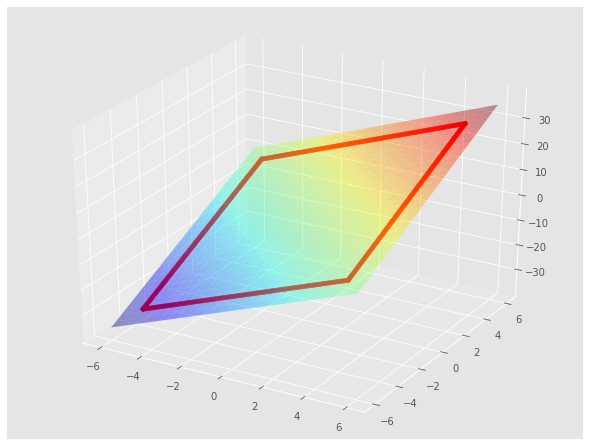

In [20]:
#
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)

X = np.linspace(-6, 6, 30)
Y = np.linspace(-6, 6, 30)
X,Y=np.meshgrid(X,Y)
func= 3*X+3*Y
base=0*X

X1 = np.linspace(-5, 5, 100)
Y1 = np.linspace(-5, 5, 100)
Z1=3*X1-15

X2 = np.linspace(-5, 5, 100)
Y2 = np.linspace(-5, 5, 100)
Z2=3*Y2+3*5

X3 = np.linspace(-5, 5, 100)
Y3 = np.linspace(-5, 5, 100)
Z3=3*X1+15

X4= np.linspace(-5, 5, 100)
Y4 = np.linspace(-5, 5, 100)
Z4=3*Y2-3*5


ax.scatter(X1,0*Y1-5,Z1, color="red",alpha=0.9)
ax.scatter(0*X2+5,Y2,Z2,color="red",alpha=0.9)
ax.scatter(X3,0*Y1+5,Z3, color="red",alpha=0.9)
ax.scatter(0*X4-5,Y4,Z4,color="red",alpha=0.9)


ax.plot_surface(X,Y, func, rstride=1, cstride=1, cmap=cm.jet,alpha=0.4)

#ax.plot_surface(X,Y, base, rstride=1, cstride=1, cmap=cm.jet,alpha=0.2)


Q$^\circ$4.
---
$f(x,y,z) = (x-3)^2+(y-3)^2+(z-3)^2$  with $0\le x,y,z$ and $x+y+z\le9$.


1. critical point, $(0,0,0)=\nabla f\Rightarrow ,x=y=z=3$, which is also the point evaluated by Lagrange multiplier..
- corner points, (9,0,0),(0,9,0),(0,0,9).

Maximum occurs at the corner point i.e. 54 and Minimum is 0.

In [21]:
f=(x-3)**2+(y-3)**2+(z-3)**2
cond1=9-x-y-z
lagrangian(f,[x,y,z],[cond1])

Function, (x - 3)**2 + (y - 3)**2 + (z - 3)**2, subject to -x - y - z + 9=0
===
  f= (x - 3)**2 + (y - 3)**2 + (z - 3)**2 = 0

  Only one critical found, (x,y,z)=(3,3,3)
  ---

  it could  be extremum.


Q$^\circ$5.
---
$f(x,y) = x^2-xy+y^2-2x+2y$   where $0\le y\le \le2$

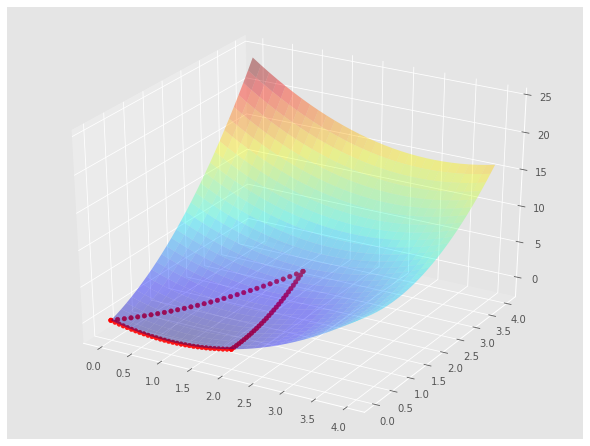

In [51]:
#
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)

X = np.linspace(0, 4, 30)
Y = np.linspace(0, 4, 30)
X,Y=np.meshgrid(X,Y)
func= X**2-X*Y+Y**2-2*X+2*Y
base=0*X

X1 = np.linspace(0, 2, 30)
Y1 = 0*np.linspace(0, 2, 30)
Z1=X1**2-X1*Y1+Y1**2-2*X1+2*Y1

X2 = 0*np.linspace(0, 2, 30)+2
Y2 = np.linspace(0, 2, 30)
Z2=X2**2-X2*Y2+Y2**2-2*X2+2*Y2

X3 = np.linspace(0, 2, 30)
Y3 = X3
Z3=X3**2-X3*Y3+Y3**2-2*X3+2*Y3


ax.scatter(X1,Y1,Z1, color="red",alpha=0.9)
ax.scatter(X2,Y2,Z2, color="red",alpha=0.9)
ax.scatter(X3,Y3,Z3, color="red",alpha=0.9)


ax.plot_surface(X,Y, func, rstride=1, cstride=1, cmap=cm.jet,alpha=0.4)


In [52]:
f=x**2-x*y+y**2-2*x+2*y
criticaltype(f)

Hessian Matrix
---
⎡2   -1⎤
⎢      ⎥
⎣-1  2 ⎦
only one critical (x,y)=(2/3,-2/3)
   |H|=3>0, fxx=2>0:  local minimum here.


In [53]:
cond1=y-x
lagrangian(f,[x,y],[cond1])

Function, x**2 - x*y - 2*x + y**2 + 2*y, subject to -x + y=0
===
  f= x**2 - x*y - 2*x + y**2 + 2*y = 0

  Only one critical found, (x,y)=(0,0)
  ---

  it could  be extremum.


In [55]:
cond1=2-x
lagrangian(f,[x,y],[cond1])

Function, x**2 - x*y - 2*x + y**2 + 2*y, subject to 2 - x=0
===
  f= x**2 - x*y - 2*x + y**2 + 2*y = 0

  Only one critical found, (x,y)=(2,0)
  ---

  it could  be extremum.


In [54]:
cond1=y
lagrangian(f,[x,y],[cond1])

Function, x**2 - x*y - 2*x + y**2 + 2*y, subject to y=0
===
  f= x**2 - x*y - 2*x + y**2 + 2*y = -1

  Only one critical found, (x,y)=(1,0)
  ---

  it could  be extremum.


1. no critical point
- on boundary, by lagrange's multipler, a) l1: $y=0$, b) l2: $x=2$ c): l3: $x=y, 0\le x\le2$
Maximum: $f(2,2)=4$, minimum: $f(1,0)=-1$.

Q$^\circ$6.
---
$f(x,y) = x^2-xy+y^2-5x+5y$   where $-5\le x,y \le5$

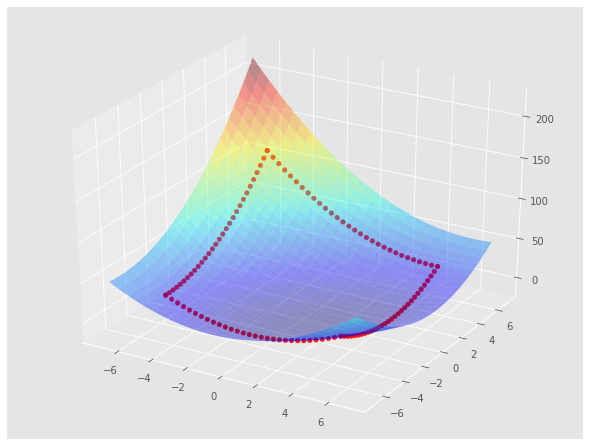

In [45]:
#
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)

X = np.linspace(-7, 7, 30)
Y = np.linspace(-7, 7, 30)
X,Y=np.meshgrid(X,Y)
func= X**2-X*Y+Y**2-5*X+5*Y
base=0*X

X1 = np.linspace(-5, 5, 30)
Y1 = 0*np.linspace(-5, 5, 30)-5
Z1=X1**2-X1*Y1+Y1**2-5*X1+5*Y1

X2 = 0*np.linspace(-5, 5, 30)+5
Y2 = np.linspace(-5, 5, 30)
Z2=X2**2-X2*Y2+Y2**2-5*X2+5*Y2

X3 = np.linspace(-5, 5, 30)
Y3 = 0*np.linspace(-5, 5, 30)+5
Z3=X3**2-X3*Y3+Y3**2-5*X3+5*Y3

X4 = 0*np.linspace(-5, 5, 30)-5
Y4 = np.linspace(-5, 5, 30)
Z4=X4**2-X4*Y4+Y4**2-5*X4+5*Y4

ax.scatter(X1,Y1,Z1, color="red",alpha=0.9)
ax.scatter(X2,Y2,Z2, color="red",alpha=0.9)
ax.scatter(X3,Y3,Z3, color="red",alpha=0.9)
ax.scatter(X4,Y4,Z4, color="red",alpha=0.9)


ax.plot_surface(X,Y, func, rstride=1, cstride=1, cmap=cm.jet,alpha=0.4)


In [46]:
f=x**2-x*y+y**2-5*x+5*y
criticaltype(f)

Hessian Matrix
---
⎡2   -1⎤
⎢      ⎥
⎣-1  2 ⎦
only one critical (x,y)=(5/3,-5/3)
   |H|=3>0, fxx=2>0:  local minimum here.


In [47]:
cond1=5-x
lagrangian(f,[x,y],[cond1])

Function, x**2 - x*y - 5*x + y**2 + 5*y, subject to 5 - x=0
===
  f= x**2 - x*y - 5*x + y**2 + 5*y = 0

  Only one critical found, (x,y)=(5,0)
  ---

  it could  be extremum.


In [48]:
cond1=5+x
lagrangian(f,[x,y],[cond1])

Function, x**2 - x*y - 5*x + y**2 + 5*y, subject to x + 5=0
===
  f= x**2 - x*y - 5*x + y**2 + 5*y = 25

  Only one critical found, (x,y)=(-5,-5)
  ---

  it could  be extremum.


In [49]:
cond1=5+y
lagrangian(f,[x,y],[cond1])

Function, x**2 - x*y - 5*x + y**2 + 5*y, subject to y + 5=0
===
  f= x**2 - x*y - 5*x + y**2 + 5*y = 0

  Only one critical found, (x,y)=(0,-5)
  ---

  it could  be extremum.


In [50]:
cond1=5-y
lagrangian(f,[x,y],[cond1])

Function, x**2 - x*y - 5*x + y**2 + 5*y, subject to 5 - y=0
===
  f= x**2 - x*y - 5*x + y**2 + 5*y = 25

  Only one critical found, (x,y)=(5,5)
  ---

  it could  be extremum.


Consider function on critical point and boundary points: maximum is 25 and minimum is -25/3 at critical point.

Q$^\circ$7.
---
$f(x,y) = x^2-xy+y^2-x+y$   where $x^2+y^2\le1$


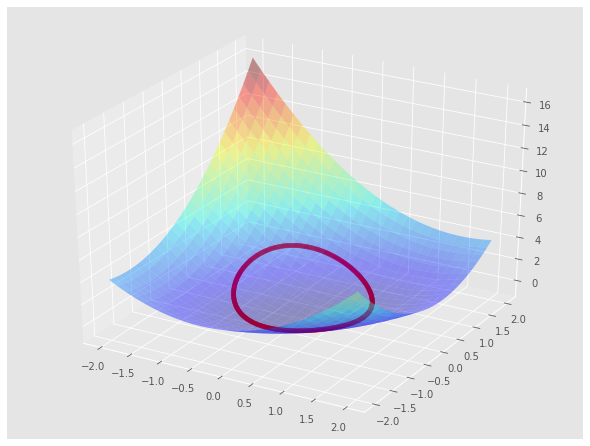

In [34]:
#
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)

X = np.linspace(-2, 2, 30)
Y = np.linspace(-2, 2, 30)
X,Y=np.meshgrid(X,Y)
func= X**2-X*Y+Y**2-X+Y
base=0*X

T=np.linspace(0, 2*np.pi, 200)
X1 = np.cos(T)
Y1 = np.sin(T)
Z1=X1**2-X1*Y1+Y1**2-X1+Y1

ax.scatter(X1,Y1,Z1, color="red",alpha=0.9)

ax.plot_surface(X,Y, func, rstride=1, cstride=1, cmap=cm.jet,alpha=0.4)


In [35]:
f=x**2-x*y+y**2-x+y
criticaltype(f)

Hessian Matrix
---
⎡2   -1⎤
⎢      ⎥
⎣-1  2 ⎦
only one critical (x,y)=(1/3,-1/3)
   |H|=3>0, fxx=2>0:  local minimum here.


In [38]:
cond1=1-x**2-y**2
lagrangian(f,[x,y],[cond1])

Function, x**2 - x*y - x + y**2 + y, subject to -x**2 - y**2 + 1=0
===
  1֯ ). f = x**2 - x*y - x + y**2 + y = 0 at critical value (x,y)=(0,-1)
  2֯ ). f = x**2 - x*y - x + y**2 + y = 0 at critical value (x,y)=(1,0)
  3֯ ). f = x**2 - x*y - x + y**2 + y = sqrt(2) + 3/2 at critical value (x,y)=(-sqrt(2)/2,sqrt(2)/2)
  4֯ ). f = x**2 - x*y - x + y**2 + y = 3/2 - sqrt(2) at critical value (x,y)=(sqrt(2)/2,-sqrt(2)/2)
  ---

  Maximum on the boundary is sqrt(2) + 3/2
  Minimum on the boundary is 0


Extrema at 
1. critical point: (1/3,-1/3), $f(1/3,-1/3)=1/3$
- boundary points, 
\begin{eqnarray}
   L&=& x^2-xy+y^2-x+y+\lambda(1-x^2-y^2)\\
   \nabla L&=&\vec 0\\
   \Rightarrow(x,y)&=& (0,-1),(1,0),\\
                    &&(-\sqrt(2)/2,\sqrt(2)/2),(\sqrt(2)/2,-\sqrt(2)/2)
\end{eqnarray}
Maximum: 3/2+\sqrt2, Minima= -1/3.

Q$^\circ$8.
---
$f(x,y,z) = 3x+3y-4z$  where $0\le x,y\le5, 0\le z\le1$

Maximum is 24, minimum is -4 at corner points.

Q$^\circ$9.
---
$f(x,y,z) = 3x^2+5y^2+5x-4z^2$  
for $0\le x,y,z.


In [31]:
f=3*x**2+5*y**2-4*z**2

CriticalType(f,[x,y,z])

Hessian Matrix
---
⎡6  0   0 ⎤
⎢         ⎥
⎢0  10  0 ⎥
⎢         ⎥
⎣0  0   -8⎦

---

only one critical (x,y,z)=(0,0,0)
   |H|=-480<0:  Saddle point here.


Neither maximum nor minimum exists.

Q$^\circ$10.
---
$f(x,y) = 2xy$ where $x^2+y^2=5^2$.


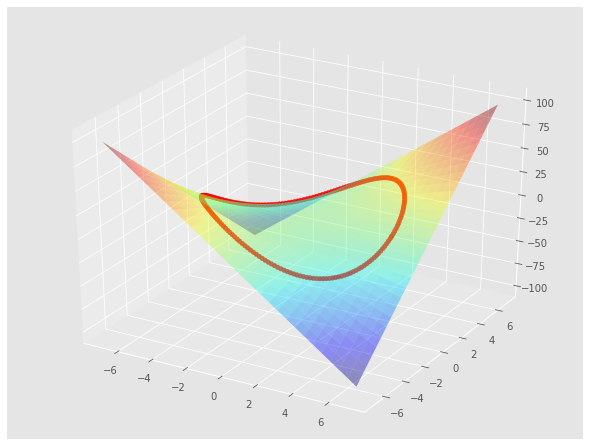

In [2]:
#
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)

X = np.linspace(-7, 7, 30)
Y = np.linspace(-7, 7, 30)
X,Y=np.meshgrid(X,Y)
func= 2*X*Y
base=0*X

T=np.linspace(0, 2*np.pi, 200)
X1 = 5*np.cos(T)
Y1 = 5*np.sin(T)
Z1=2*X1*Y1

ax.scatter(X1,Y1,Z1, color="red",alpha=0.9)

ax.plot_surface(X,Y, func, rstride=1, cstride=1, cmap=cm.jet,alpha=0.4)


In [23]:
f=2*x*y
cond1=25-x**2-y**2
lagrangian(f,[x,y],[cond1])

Function, 2*x*y, subject to -x**2 - y**2 + 25=0
===
  1֯ ). f = 2*x*y = 25 at critical value (x,y)=(-5*sqrt(2)/2,-5*sqrt(2)/2)
  2֯ ). f = 2*x*y = -25 at critical value (x,y)=(-5*sqrt(2)/2,5*sqrt(2)/2)
  3֯ ). f = 2*x*y = -25 at critical value (x,y)=(5*sqrt(2)/2,-5*sqrt(2)/2)
  4֯ ). f = 2*x*y = 25 at critical value (x,y)=(5*sqrt(2)/2,5*sqrt(2)/2)
  ---

  Maximum on the boundary is 25
  Minimum on the boundary is -25


\begin{eqnarray}
   L&=& 2xy+\lambda(25-x^2-y^2)\\
   \nabla L&=&\vec 0\\
   \Rightarrow(x,y)&=& \pm(5\sqrt 2/2,5\sqrt2 /2),\\
                    &&\pm(5\sqrt 2/2,-5\sqrt2 /2)
\end{eqnarray}

This got the last result.

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


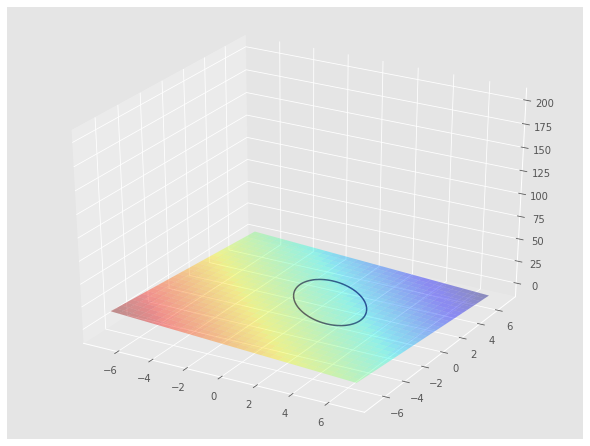

In [13]:
#
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)

X = np.linspace(-7, 7, 30)
Y = np.linspace(-7, 7, 30)
X,Y=np.meshgrid(X,Y)
func= 3-X-Y
base=0*X

T=np.linspace(0, 2*np.pi, 200)
X1 = np.sqrt(11)*np.cos(T)
Y1 = np.sqrt(11)*np.sin(T)
Z1=np.sqrt(11-X1**2-Y1**2)

#ax.scatter(X1,Y1,Z1, color="red",alpha=0.9)

ax.plot_surface(X,Y, func, rstride=1, cstride=1, cmap=cm.jet,alpha=0.4)

y,x=np.ogrid[-5:5:100j,-5:5:100j]
#plt.figure(figsize=(8,8))
ax.contour(x.ravel(),y.ravel(),x**2+y**2+(3-x-y)**2-11,[1])

In [8]:
x,y=np.meshgrid(x,y)

In [9]:
ax.plot_surface(x,y,x+y, rstride=1, cstride=1, cmap=cm.jet,alpha=0.4)

In [4]:
from sympy import exp,log

f=-log(1+exp(a+x))-log(1+exp(a-x))

In [7]:
(diff(f,x),x)

(-exp(a + x)/(exp(a + x) + 1) + exp(a - x)/(exp(a - x) + 1), x)

In [ ]:
f=2*x*y
cond1=25-x**2-y**2
lagrangian(f,[x,y],[cond1])

11-8, p727
---

In [8]:
#11.8 
#5 #Max 2x+2xy+y subject to 2x+y=100
f=2*x+2*x*y+y
cond1=100-2*x-y
lagrangian(f,[x,y],[cond1])

Function, 2*x*y + 2*x + y, subject to -2*x - y + 100=0
===
  f= 2*x*y + 2*x + y = 2600

  Only one critical found, (x,y)=(25,50)
  ---

  it could  be extremum.


In [9]:
#7 Max sqrt(6-x^2-y^2), x+y=2
f=6-x**2-y**2
cond1=2-x-y
lagrangian(f,[x,y],[cond1])

Function, -x**2 - y**2 + 6, subject to -x - y + 2=0
===
  f= -x**2 - y**2 + 6 = 4

  Only one critical found, (x,y)=(1,1)
  ---

  it could  be extremum.


In [10]:
#14 e^(-xy/4) subject to x^2+y^2<=1
f=exp(-x*y/4)
cond1=1-x**2-y**2
lagrangian(f,[x,y],[cond1])

Function, exp(-x*y/4), subject to -x**2 - y**2 + 1=0
===
  1֯ ). f = exp(-x*y/4) = exp(-1/8) at critical value (x,y)=(-sqrt(2)/2,-sqrt(2)/2)
  2֯ ). f = exp(-x*y/4) = exp(1/8) at critical value (x,y)=(-sqrt(2)/2,sqrt(2)/2)
  3֯ ). f = exp(-x*y/4) = exp(1/8) at critical value (x,y)=(sqrt(2)/2,-sqrt(2)/2)
  4֯ ). f = exp(-x*y/4) = exp(-1/8) at critical value (x,y)=(sqrt(2)/2,sqrt(2)/2)
  ---

  Maximum on the boundary is exp(1/8)
  Minimum on the boundary is exp(-1/8)


Also, $(x,y)=(0,0)$, the critical point, is neither max nor min.

In [18]:
# 16 Min x^2+y^2+z^2 subject to x+2z=6 and x+y=12
f=x**2+y**2+z**2
cond1=6-2*z-x
cond2=12-x-y
lagrangian(f,[x,y,z],[cond1,cond2])

Function, x**2 + y**2 + z**2, subject to -x - 2*z + 6=0 and -x - y + 12=0
===
  f= x**2 + y**2 + z**2 = 72

  Only one critical found, (x,y,z)=(6,6,0)
  ---

  it could  be extremum.


In [13]:
#17 min distance (0.0) to x+y=1
f=x**2+y**2
cond1=1-x-y
lagrangian(f,[x,y],[cond1])

Function, x**2 + y**2, subject to -x - y + 1=0
===
  f= x**2 + y**2 = 1/2

  Only one critical found, (x,y)=(1/2,1/2)
  ---

  it could  be extremum.


In [14]:
#23 min distance (4,4) to x^2+(y-1)^2=9
f=(x-4)**2+(y-4)**2
cond1=9-x**2-(y-1)**2
lagrangian(f,[x,y],[cond1])

Function, (x - 4)**2 + (y - 4)**2, subject to -x**2 - (y - 1)**2 + 9=0
===
  1֯ ). f = (x - 4)**2 + (y - 4)**2 = 64 at critical value (x,y)=(-12/5,-4/5)
  2֯ ). f = (x - 4)**2 + (y - 4)**2 = 4 at critical value (x,y)=(12/5,14/5)
  ---

  Maximum on the boundary is 64
  Minimum on the boundary is 4


In [16]:
#28 max z with x^2+y^2+z^2=36 and 2x+y-z=2, highest point in the section
f=z
cond1=36-x**2-y**2-z**2
cond2=2-2*x-y+z
lagrangian(f,[x,y,z],[cond1,cond2])

Function, z, subject to -x**2 - y**2 - z**2 + 36=0 and -2*x - y + z + 2=0
===
  1֯ ). f = z = -sqrt(265)/3 - 1/3 at critical value (x,y,z)=(2/3 - 2*sqrt(265)/15,1/3 - sqrt(265)/15,-sqrt(265)/3 - 1/3)
  2֯ ). f = z = -1/3 + sqrt(265)/3 at critical value (x,y,z)=(2/3 + 2*sqrt(265)/15,1/3 + sqrt(265)/15,-1/3 + sqrt(265)/3)
  ---

  Maximum on the boundary is -1/3 + sqrt(265)/3
  Minimum on the boundary is -sqrt(265)/3 - 1/3
